Run the cell with a code, wait ~5 sec and provide an input. To see the list of the available countries check cell 3


 

Type the name of the country for which you want to see the growth rate of COVID - 19 cases.


Type here: 
 
Ukraine


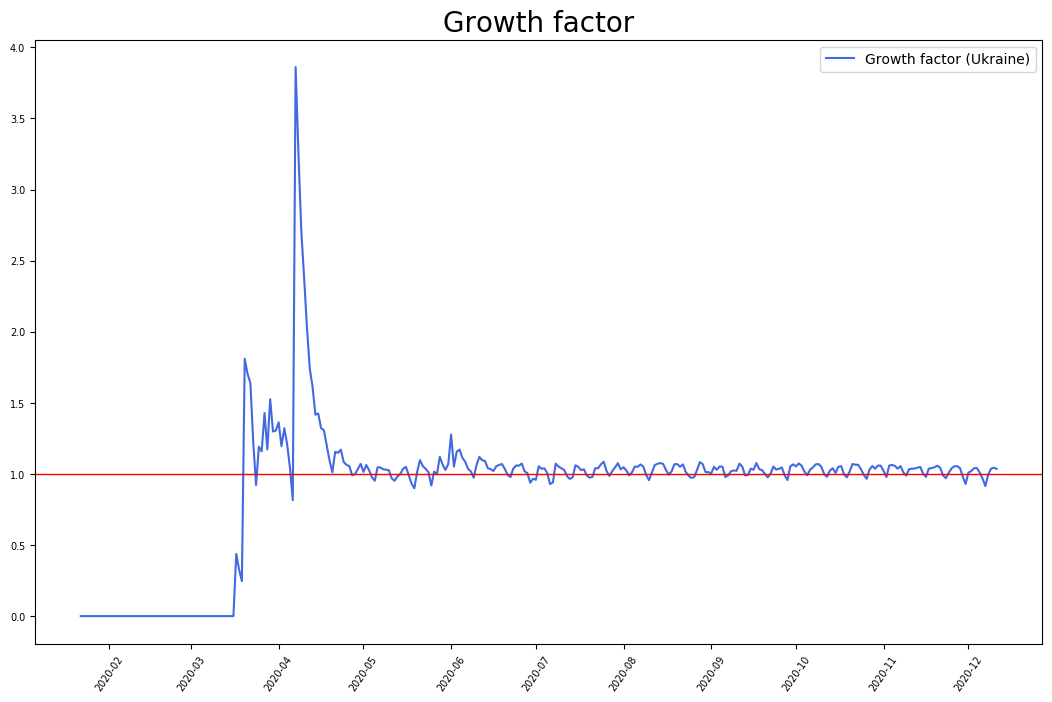

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
from urllib.request import urlretrieve
# register_matplotlib_converters()

#read ds from url
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=\
https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster\
%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_\
confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
#drop unneeded columns
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
#group by country
dfg = df.groupby('Country/Region').sum()
#reset index to create a final dataset to work with
dfgf = dfg.reset_index()
# dfgf.columns = map(str.lower, dfgf.columns)
# print(dfgf)
# transpone the dataset(in order to be able to print a list of countries)
dft = dfg.T.copy()
dft = dft.reset_index()
# tell the user what countries are present in the dataset
countriesn = dft.columns.values
countriesstr = ""
for a in countriesn:
	if a != "index":
		countriesstr += (a + "\n")
# print(countriesstr)
def us_input():
	userinput = input\
("""\n \n
Type the name of the country for which you want to see the growth rate of COVID - 19 cases.\n
\nType here: \n \n""")
	return(userinput)

def calc_gr_f(country_name):
	# here we single out a column with countries to be able to do a diff for all other columns:
	c = dfgf['Country/Region']
	# now we do a diff for all other columns in order to find the new cases for each new day
	# and then fill NA values:
	dfgrd = dfgf.iloc[:, 1:].diff(axis = 1, periods =1)
	dfgrd.fillna(0, inplace = True)
	# now we divide each column by previous column. Here we are getting the growth factor:
	growth_f = dfgrd/ (dfgrd.shift(periods=1, fill_value=0, axis=1))
	# print(growth_f)
	#now we concat the column with the country name back:
	growth_f = pd.concat([c, pd.DataFrame(growth_f)], axis=1)
	# print(growth_f)
	# and now we get rid of inf and nans:
	growth_f = growth_f.replace([np.inf, -np.inf], np.nan)
	growth_f.fillna(0, inplace = True)
	# here we transponse the df to be able to build a better graph
	growth_f = growth_f.set_index('Country/Region').transpose()
	# print(growth_f)
	# and reset index for same purpose
	growth_f.reset_index(inplace = True)
	# print(growth_f)
	# here we apply exponentially weighted moving average
	growth_f_smooth = growth_f.ewm(span=7).mean()
	# growth_f_smooth.reset_index(inplace = True)
	# print(growth_f_smooth)
	# here build a growth factor curve
	fig, ax = plt.subplots(figsize = (13, 8), dpi= 100)
	# fig = plt.figure(figsize = (13, 8), dpi= 100)
	# ax.set_yticks([0], minor=True)
	growth_f['date'] = pd.to_datetime(growth_f['index'])
	forlabel = 'Growth factor (' + country_name + ")"
	plt.plot(growth_f['date'], growth_f_smooth[country_name],\
	 label = forlabel, color = "royalblue")
	plt.xticks(rotation = 55, fontsize = 7)
	plt.yticks(fontsize = 7)
	plt.title ('Growth factor', fontsize = 20)
	plt.legend(fontsize = 10)
	# ax.yaxis.grid()
	ax.axhline(1, linestyle = '-', color = 'r', linewidth = "1")
	# plt.grid(color='r',linestyle='-', linewidth=1, axis = "y", )

	plt.show()
calc_gr_f(us_input())



FYI: The countries present in the dataset are the following:

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
South Sudan
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Syria
Taiwan*
Tajikistan
Tanzania
Thailand
Timor-Leste
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Uganda
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam
West Bank and Gaza
Yemen
Zambia
Zimbabwe